# **Background and Context**
The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications. The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with, learn and train models that accurately identify street numbers, and incorporate them into all sorts of projects.

# **Objective:**
In this project, we will use a dataset with images centered around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simple. Given the dataset, our aim is to build a model that can identify house numbers in an image.

# **Dataset**

The dataset has the following features:

Number of classes: 10

Training data: 42000 images

Testing data: 18000 images

Note that we aim to use only 2000 samples from the train and the test data set for simplicity.

In [1]:
# importing the required packages  
import h5py
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from keras.utils import np_utils
from tensorflow.keras.utils import to_categorical
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
#Mount the drive for google colab usage
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#defining the path of the dataset after uploadig the dataset.h5 into the drive
dataset_file = '/content/drive/MyDrive/Project_SVHN/SVHN_single_grey1.h5'


In [4]:
#Reading the .h5 file from the path
import h5py
h5f = h5py.File(dataset_file, 'r')
h5f


<HDF5 file "SVHN_single_grey1.h5" (mode r)>

In [5]:
# Studying the number of keys in the file
for key in h5f.keys():
    print(key) #Names of the groups in HDF5 file.

X_test
X_train
X_val
y_test
y_train
y_val


***The dataset has 6 keys which are : X_test, X_train, X_val, y_test,y_train, y_val***

In [6]:
#Convert datafile to Numpy 
data = np.fromfile(dataset_file, dtype=float)
print(data)

[5.29239776e-260 1.11688278e-308 5.18067355e-318 ... 3.88209829e-265
 3.88209829e-265 3.88209829e-265]


In [7]:
#Confirm the Shape of the dataset
data.shape

(61455512,)

In [8]:
#Confirm the shape of each of the 6 keys 
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_val = h5f['X_val'][:]
y_val = h5f['y_val'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]


In [9]:
#Printing the X_test, y_test, X_train, y_train, X_val, y_val shapes 
print(X_test.shape)
print(X_train.shape)
print(X_val.shape)
print(y_test.shape)
print(y_train.shape)
print(y_val.shape)

(18000, 32, 32)
(42000, 32, 32)
(60000, 32, 32)
(18000,)
(42000,)
(60000,)


**The image size **is** 32 x 32 **

### **DATA VISUALIZATION**

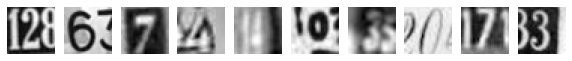

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
# visualizing the first 10 images in the X_train in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (y_train[0:10]))

## **Pre-Processing the Data **

In [11]:
# Flatten the images
image_vector_size = 32*32
x_train = X_train.reshape(X_train.shape[0], image_vector_size)
x_val = X_val.reshape(X_val.shape[0], image_vector_size)

# # normalize inputs from 0-255 to 0-1
x_train = x_train / 255.0
x_val = x_val / 255.0

print('Training set', x_train.shape, y_train.shape)
print('Validation set', x_val.shape, y_val.shape)

Training set (42000, 1024) (42000,)
Validation set (60000, 1024) (60000,)


**The training and the validation data would be use for the model while the test data would be reserved for validation**

In [12]:
# Extract 2000 samples to be used in the modelling    
x_tr =x_train[:2000]
x_val =x_val[:2000]
y_tr = y_train[:2000]
y_val = y_val[:2000]

In [13]:
y_val.shape # Confirm the 2000 sample 

(2000,)

In [14]:
# Convert to the output variable to "one-hot" vectors using the to_categorical function
num_classes = 10
y_tr = to_categorical(y_tr,num_classes)
y_val = to_categorical(y_val,num_classes)

In [15]:
y_tr.shape #Confirm the 200 sample and the category number classes 

(2000, 10)

# **Defining the Sequential Model**

In [16]:
#Defining the Sequential Model
image_size=32*32

# create model
model = Sequential()  
model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation='Softmax')) ### For multiclass classification Softmax is used, this is num_class = 10

In [17]:
# Compile the model
#RMS_prop=optimizers.RMSprop()   ## we can similarly use different optimizers like RMSprop, Adagrad and SGD 
adam = optimizers.Adam(lr=1e-3) # Adam optimiser is used 
model.compile(loss= 'categorical_crossentropy', optimizer=adam, metrics=['accuracy']) ### Loss function used = Categorical cross entropy

In [18]:
## Looking into our base model to get the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                                 
Total params: 285,418
Trainable params: 285,418
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr, y_tr, validation_data=(x_val, y_val), batch_size=128, epochs=10) 

Epoch 1/10
16/16 [==============================] - 2s 43ms/step - loss: 2.3734 - accuracy: 0.0950 - val_loss: 2.6351 - val_accuracy: 0.0000e+00
Epoch 2/10
16/16 [==============================] - 0s 20ms/step - loss: 2.3166 - accuracy: 0.1030 - val_loss: 2.3512 - val_accuracy: 0.0010
Epoch 3/10
16/16 [==============================] - 0s 15ms/step - loss: 2.3026 - accuracy: 0.1030 - val_loss: 2.4568 - val_accuracy: 0.0000e+00
Epoch 4/10
16/16 [==============================] - 0s 15ms/step - loss: 2.2996 - accuracy: 0.1050 - val_loss: 2.3225 - val_accuracy: 0.0035
Epoch 5/10
16/16 [==============================] - 0s 16ms/step - loss: 2.3039 - accuracy: 0.1085 - val_loss: 2.0787 - val_accuracy: 0.9610
Epoch 6/10
16/16 [==============================] - 0s 25ms/step - loss: 2.3046 - accuracy: 0.1050 - val_loss: 2.2026 - val_accuracy: 0.2730
Epoch 7/10
16/16 [==============================] - 0s 16ms/step - loss: 2.2965 - accuracy: 0.1140 - val_loss: 2.4632 - val_accuracy: 0.0035
Epoch

Observation : 
*   The accuracy for both Training and Validation at Epoch 10 are very low 
*   The losses are very high at Epoch 10




## **Tune the Hyperparameters of the model**





In [20]:
#Increase the Epoch to 200
model.fit(x_tr, y_tr, validation_data=(x_val, y_val), batch_size=128, epochs=200)  


Epoch 1/200
16/16 [==============================] - 0s 12ms/step - loss: 2.2997 - accuracy: 0.1190 - val_loss: 2.1526 - val_accuracy: 0.6070
Epoch 2/200
16/16 [==============================] - 0s 10ms/step - loss: 2.2994 - accuracy: 0.1215 - val_loss: 2.3562 - val_accuracy: 0.0165
Epoch 3/200
16/16 [==============================] - 0s 10ms/step - loss: 2.2951 - accuracy: 0.1210 - val_loss: 2.1953 - val_accuracy: 0.5120
Epoch 4/200
16/16 [==============================] - 0s 9ms/step - loss: 2.2884 - accuracy: 0.1360 - val_loss: 2.2434 - val_accuracy: 0.1995
Epoch 5/200
16/16 [==============================] - 0s 9ms/step - loss: 2.2763 - accuracy: 0.1510 - val_loss: 2.2004 - val_accuracy: 0.5760
Epoch 6/200
16/16 [==============================] - 0s 9ms/step - loss: 2.2603 - accuracy: 0.1625 - val_loss: 2.2097 - val_accuracy: 0.3700
Epoch 7/200
16/16 [==============================] - 0s 10ms/step - loss: 2.2414 - accuracy: 0.1790 - val_loss: 2.4175 - val_accuracy: 0.0385
Epoch 8/2

# Observation  
The accuracy increased for the training dataset from 0.377 to 0.933 and the loss reduces as well.

The accuracy increased for the validation dataset from 0.480 to 0.629 and the loss reduces as well

In [21]:
# Change the number of Neurons 

#Defining the Sequential Model
image_size=32*32

# create model
model = Sequential()  
model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation='Softmax')) ### For multiclass classification Softmax is used, this is num_class = 10


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr, y_tr, validation_data=(x_val, y_val), batch_size=128, epochs=30) 

Epoch 1/30
16/16 [==============================] - 1s 22ms/step - loss: 2.3618 - accuracy: 0.1020 - val_loss: 2.3203 - val_accuracy: 0.0030
Epoch 2/30
16/16 [==============================] - 0s 10ms/step - loss: 2.3233 - accuracy: 0.1130 - val_loss: 2.4520 - val_accuracy: 5.0000e-04
Epoch 3/30
16/16 [==============================] - 0s 11ms/step - loss: 2.3118 - accuracy: 0.1160 - val_loss: 2.3052 - val_accuracy: 0.0075
Epoch 4/30
16/16 [==============================] - 0s 11ms/step - loss: 2.3065 - accuracy: 0.1175 - val_loss: 2.3875 - val_accuracy: 0.0025
Epoch 5/30
16/16 [==============================] - 0s 10ms/step - loss: 2.3138 - accuracy: 0.1015 - val_loss: 2.4318 - val_accuracy: 0.0015
Epoch 6/30
16/16 [==============================] - 0s 11ms/step - loss: 2.3078 - accuracy: 0.1220 - val_loss: 2.2384 - val_accuracy: 0.2040
Epoch 7/30
16/16 [==============================] - 0s 10ms/step - loss: 2.3074 - accuracy: 0.1030 - val_loss: 2.3707 - val_accuracy: 0.0000e+00
Epoch

In [22]:
# Change the activation function from relu to elu for the last two neurons

#Defining the Sequential Model
image_size=32*32

# create model
model = Sequential()  
model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,))) ###Multiple Dense units with Relu activation
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(128, activation='elu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='elu',kernel_initializer='he_uniform'))
model.add(Dense(10, activation='Softmax')) ### For multiclass classification Softmax is used, this is num_class = 10

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_tr, y_tr, validation_data=(x_val, y_val), batch_size=128, epochs=30) 

Epoch 1/30
16/16 [==============================] - 1s 20ms/step - loss: 2.4324 - accuracy: 0.1020 - val_loss: 2.4740 - val_accuracy: 0.0000e+00
Epoch 2/30
16/16 [==============================] - 0s 11ms/step - loss: 2.3353 - accuracy: 0.1135 - val_loss: 2.2879 - val_accuracy: 0.0065
Epoch 3/30
16/16 [==============================] - 0s 11ms/step - loss: 2.3119 - accuracy: 0.1195 - val_loss: 2.3585 - val_accuracy: 0.0000e+00
Epoch 4/30
16/16 [==============================] - 0s 10ms/step - loss: 2.3234 - accuracy: 0.1070 - val_loss: 2.5008 - val_accuracy: 5.0000e-04
Epoch 5/30
16/16 [==============================] - 0s 10ms/step - loss: 2.3105 - accuracy: 0.1090 - val_loss: 2.9605 - val_accuracy: 0.0000e+00
Epoch 6/30
16/16 [==============================] - 0s 10ms/step - loss: 2.3019 - accuracy: 0.1320 - val_loss: 2.5320 - val_accuracy: 0.0010
Epoch 7/30
16/16 [==============================] - 0s 11ms/step - loss: 2.2898 - accuracy: 0.1345 - val_loss: 2.3701 - val_accuracy: 0.01

Observation:
22

In [23]:
# Testing the model (Pre-processing)
x_test = X_test.reshape(X_test.shape[0], image_vector_size)
x_test = x_test / 255.0
y_test = to_categorical(y_test,num_classes)

In [24]:
# Evaluate the model
results = model.evaluate(x_test, y_test)

563/563 [==============================] - 1s 2ms/step - loss: 1.4714 - accuracy: 0.5234


In [25]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

563/563 [==============================] - 1s 2ms/step - loss: 1.4714 - accuracy: 0.5234
Test loss: 1.471402645111084
Test accuracy: 0.5233888626098633


#Summary and Observation 

1. The image format required the .h5 file to be read with a h5py file format 

2. The data had to be converted into an array before it can be used for the modelling 

3. The data were given for train, validation and test, while the train and validation were used in the modelling the test was only used after the model has been completed to avoid data leakage 

4. Also, noticed the difference in the accuracy and loss based on the different Neural Network Hyperparameter tunning such as: Number of neurons, activation function, optimizer, learning rate, batch size, or epochs, even though not all were tunned in the project

5. The test accuracy was a bit less than the train result but higher than the validation result, with this we could say it does not overfit even though the result was not too good. 

6. Increase in epoch tend to result in the increase of the accuracy of the  training data but the validation hover around 0.5 - 0.6 irrespective of the number of epoch which means the model overfits when the epoch is very high. 




